# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

In [9]:
dataset = get_dataset("../data/waymo_processed/*.tfrecord")
# dataset = get_dataset("../data/waymo_processed/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['../data/waymo_processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['../data/waymo_processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [28]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    
    colors = {1: [1,0,0], 2:[0,1,0], 4: [0,0,1]}
    
    fig, ax = plt.subplots(1, 1, figsize=(15,15))
    ax.axis('off')
    
    image  = batch['image'].numpy()
    h, w = image.shape[:2]
    
    h *= h / 1080.0
    w *= w / 1920.0
    
    print(h, w)
    
    ax.imshow(image)
    
    boxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    for b, c in zip(boxes, classes):
        y1, x1, y2, x2 = b
        x1 *= w
        x2 *= w
        y1 *= h
        y2 *= h
        
        print(b)
        print(y1, x1, y2, x2)
        
        b_w = x2 - x1
        b_h = y2 - y1
        rectangle = Rectangle((x1, y1), b_w, b_h, facecolor="none", edgecolor=colors[c], linewidth=2)
        ax.add_patch(rectangle)
    
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

379.25925925925924 213.33333333333331


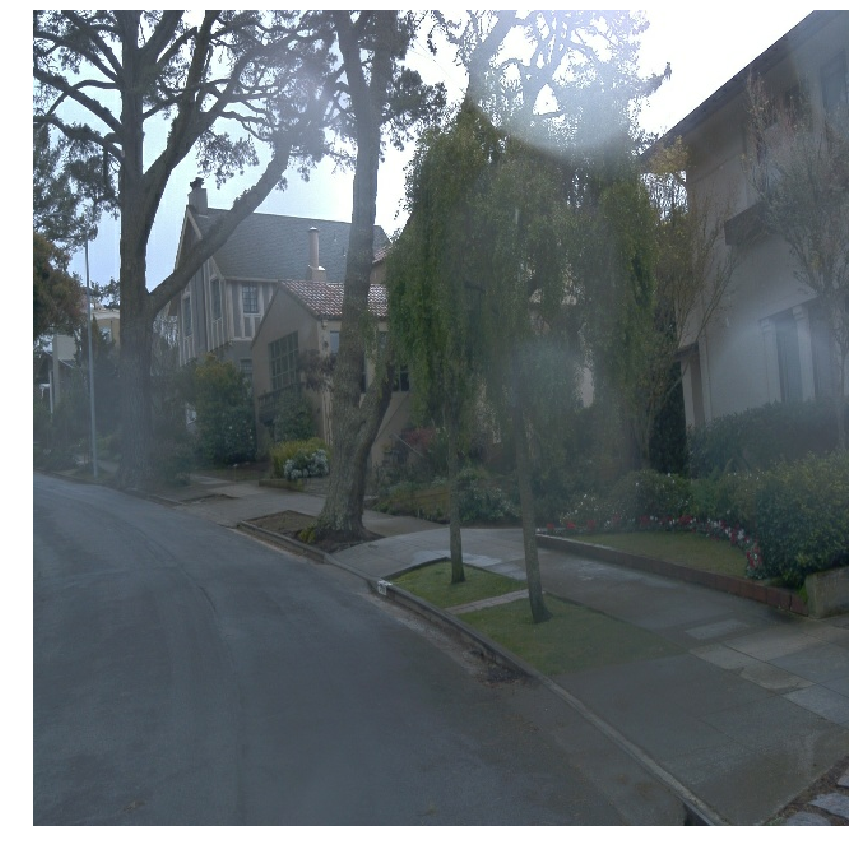

379.25925925925924 213.33333333333331
[1.0640811 1.2209829 1.267868  1.3033863]
403.5625994646991 260.4763539632161 480.8506944444444 278.0557505289713
[1.0959148 2.3260276 1.4709214 2.955644 ]
415.6358506944444 496.21922810872394 557.8605595341435 630.537363688151
[1.2079159 2.704488  1.5848962 3.       ]
458.1132902922453 576.9574483235676 601.0865614149305 640.0
[1.1245263 1.9806268 1.259726  2.4187922]
426.4869972511574 422.53372192382807 477.76276765046293 516.0090128580729
[1.1363685 0.        1.4728876 0.2786489]
430.9782805266203 0.0 558.6062735098379 59.44510142008463
[1.1421252 1.7768403 1.2388375 1.9041451]
433.16157588252315 379.05927022298175 469.8405852141203 406.2176259358724
[1.134987   0.55412054 1.271371   0.9826149 ]
430.45432761863424 118.21238199869791 482.1792263454861 209.62450663248697
[1.1422898 1.7154905 1.2340677 1.8200976]
433.2239673755787 365.9712982177734 468.0315936053241 388.2874806722005
[1.2074225 1.6001924 1.2281464 1.6209165]
457.92616102430554 341.

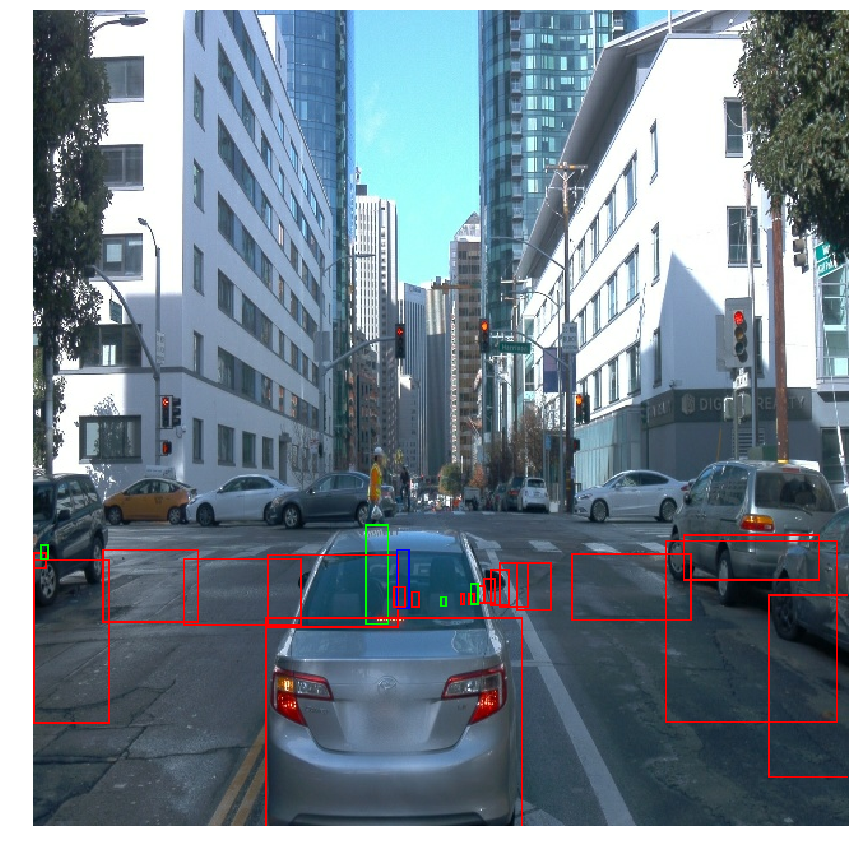

In [29]:
num = 2
for batch in dataset.shuffle(20).take(num):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...